In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(2)
memory usage: 3.2 KB


In [6]:
df.drop(['Genre','CustomerID','Age'], axis=1,inplace=True)

In [7]:
import seaborn as sns

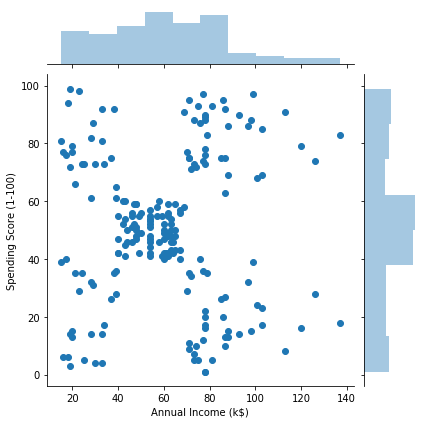

In [17]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

In [9]:
from sklearn.cluster import KMeans

In [10]:
km=KMeans(n_clusters=5)

In [11]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
#this attribute gives the squares of all distance of cluster centroids, higher the number of clusters lower is the inertia
km.inertia_

44448.45544793371

In [13]:
wcss=[]
for i in range(1,11):
    km= KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

In [15]:
import matplotlib.pyplot as plt

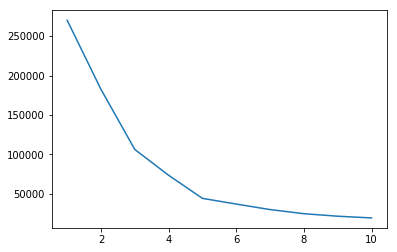

In [18]:
plt.plot(range(1,11),wcss)
#as after 5 value is not changing much...5 would ne number of clusters we are gonna use


In [19]:
km=KMeans(n_clusters=5)

In [20]:
y=km.fit_predict(df)

In [21]:
x=df.values

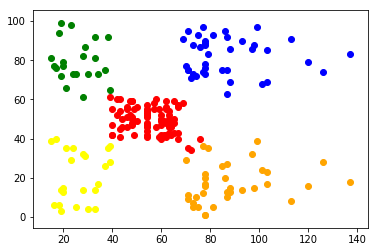

In [23]:
#assigned the color for each cluster
plt.scatter(x[y==0,0],x[y==0,1],color='yellow')
plt.scatter(x[y==1,0],x[y==1,1],color='red')
plt.scatter(x[y==2,0],x[y==2,1],color='blue')
plt.scatter(x[y==3,0],x[y==3,1],color='green')
plt.scatter(x[y==4,0],x[y==4,1],color='orange')

In [24]:
y

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [28]:
centroids=km.cluster_centers_
#gives you the centroids

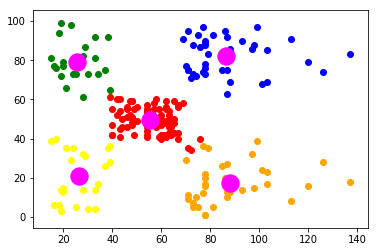

In [29]:
plt.scatter(x[y==0,0],x[y==0,1],color='yellow')
plt.scatter(x[y==1,0],x[y==1,1],color='red')
plt.scatter(x[y==2,0],x[y==2,1],color='blue')
plt.scatter(x[y==3,0],x[y==3,1],color='green')
plt.scatter(x[y==4,0],x[y==4,1],color='orange')
plt.scatter(centroids[:,0],centroids[:,1],s=300,color='magenta')

In [30]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [31]:
df['cluster']=y

In [32]:
df

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0
5,17,76,3
6,18,6,0
7,18,94,3
8,19,3,0
9,19,72,3


In [33]:
df['cluster']=df['cluster'].map({0:'high ai, low ss',1:'low ai,high ss',2:'high ai,high ss',3:'low ai,low ss',4:'medium ai medium ss'},)

In [34]:
df

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,"high ai, low ss"
1,15,81,"low ai,low ss"
2,16,6,"high ai, low ss"
3,16,77,"low ai,low ss"
4,17,40,"high ai, low ss"
5,17,76,"low ai,low ss"
6,18,6,"high ai, low ss"
7,18,94,"low ai,low ss"
8,19,3,"high ai, low ss"
9,19,72,"low ai,low ss"
